# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv("./data/nndb_flat.csv",sep=",")
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

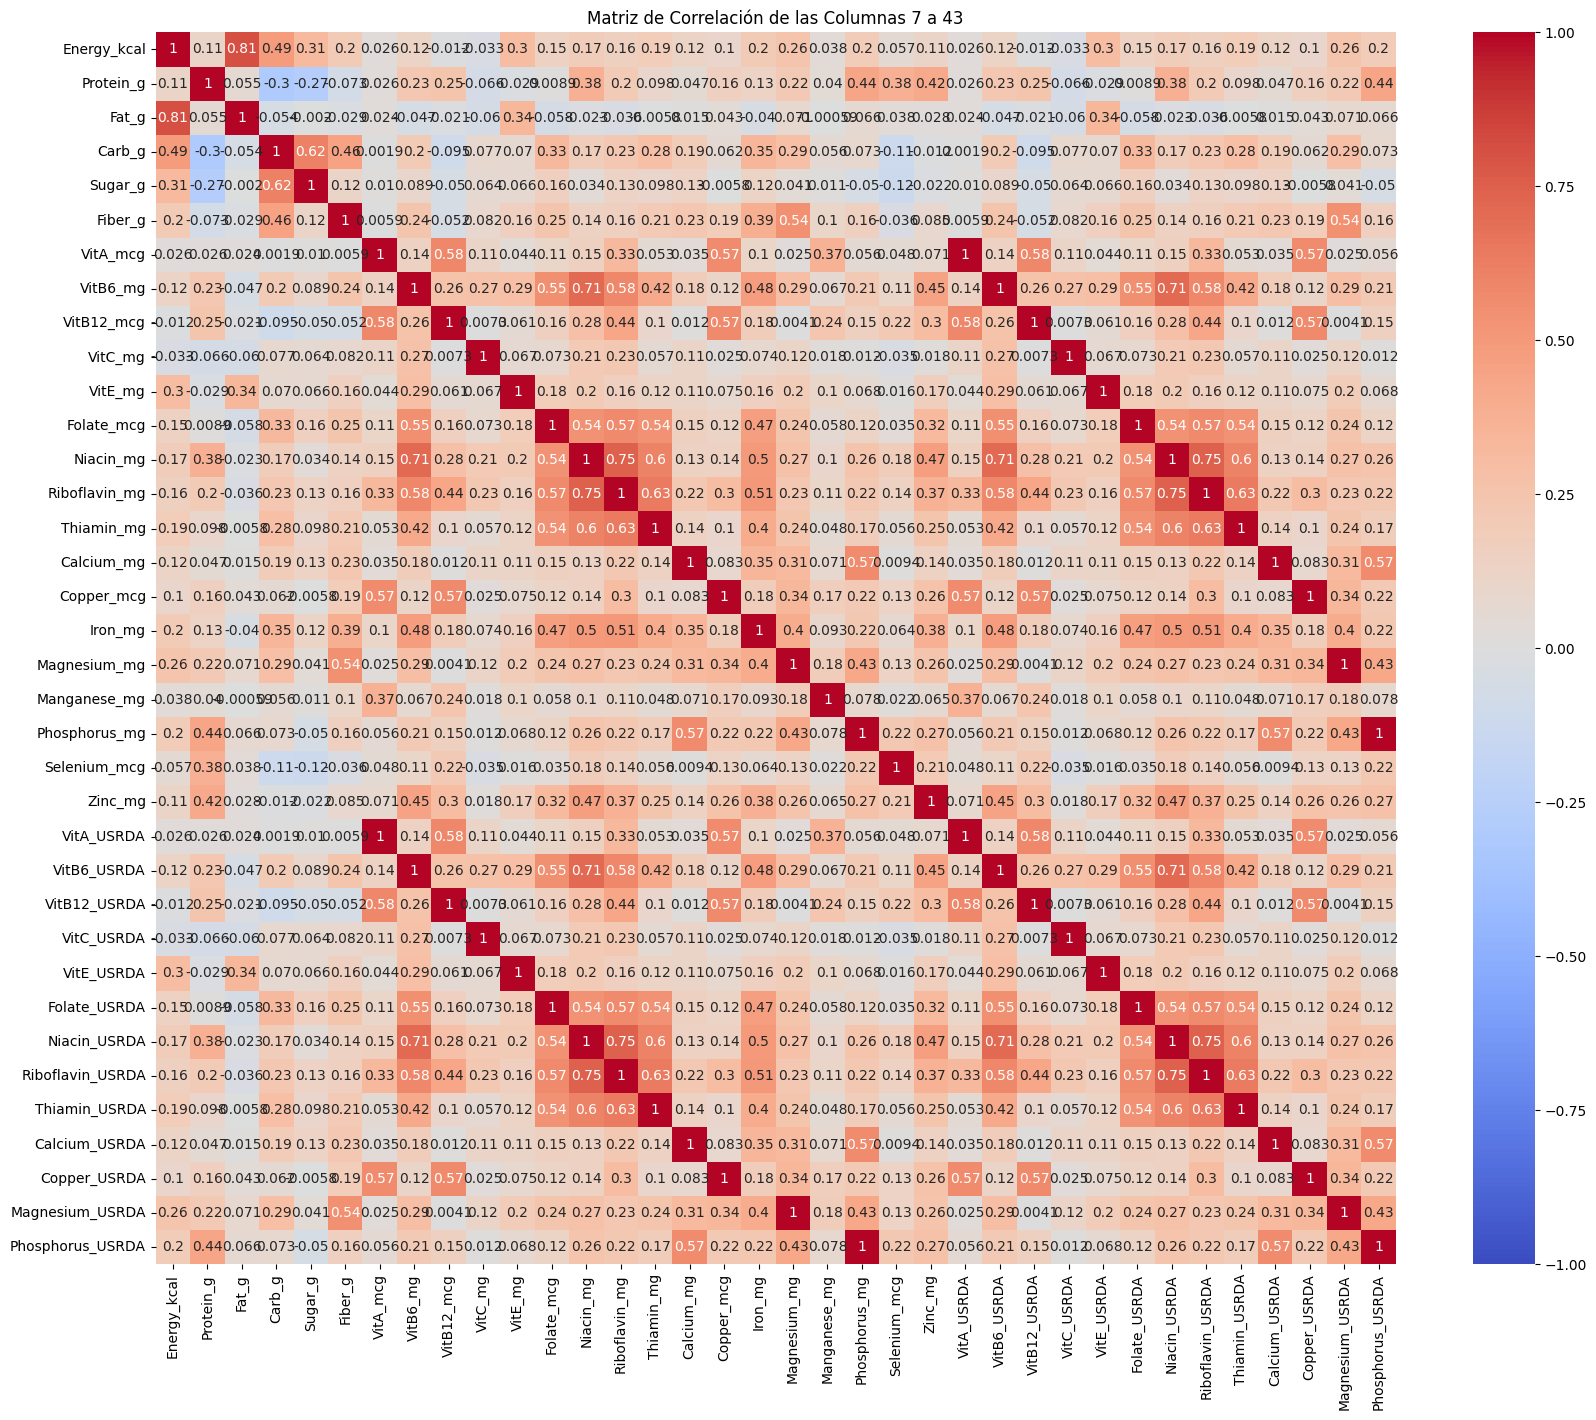

In [6]:
columnas_numericas = df.iloc[:, 7:43]
matriz_correlacion = columnas_numericas.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de las Columnas 7 a 43')
plt.show()

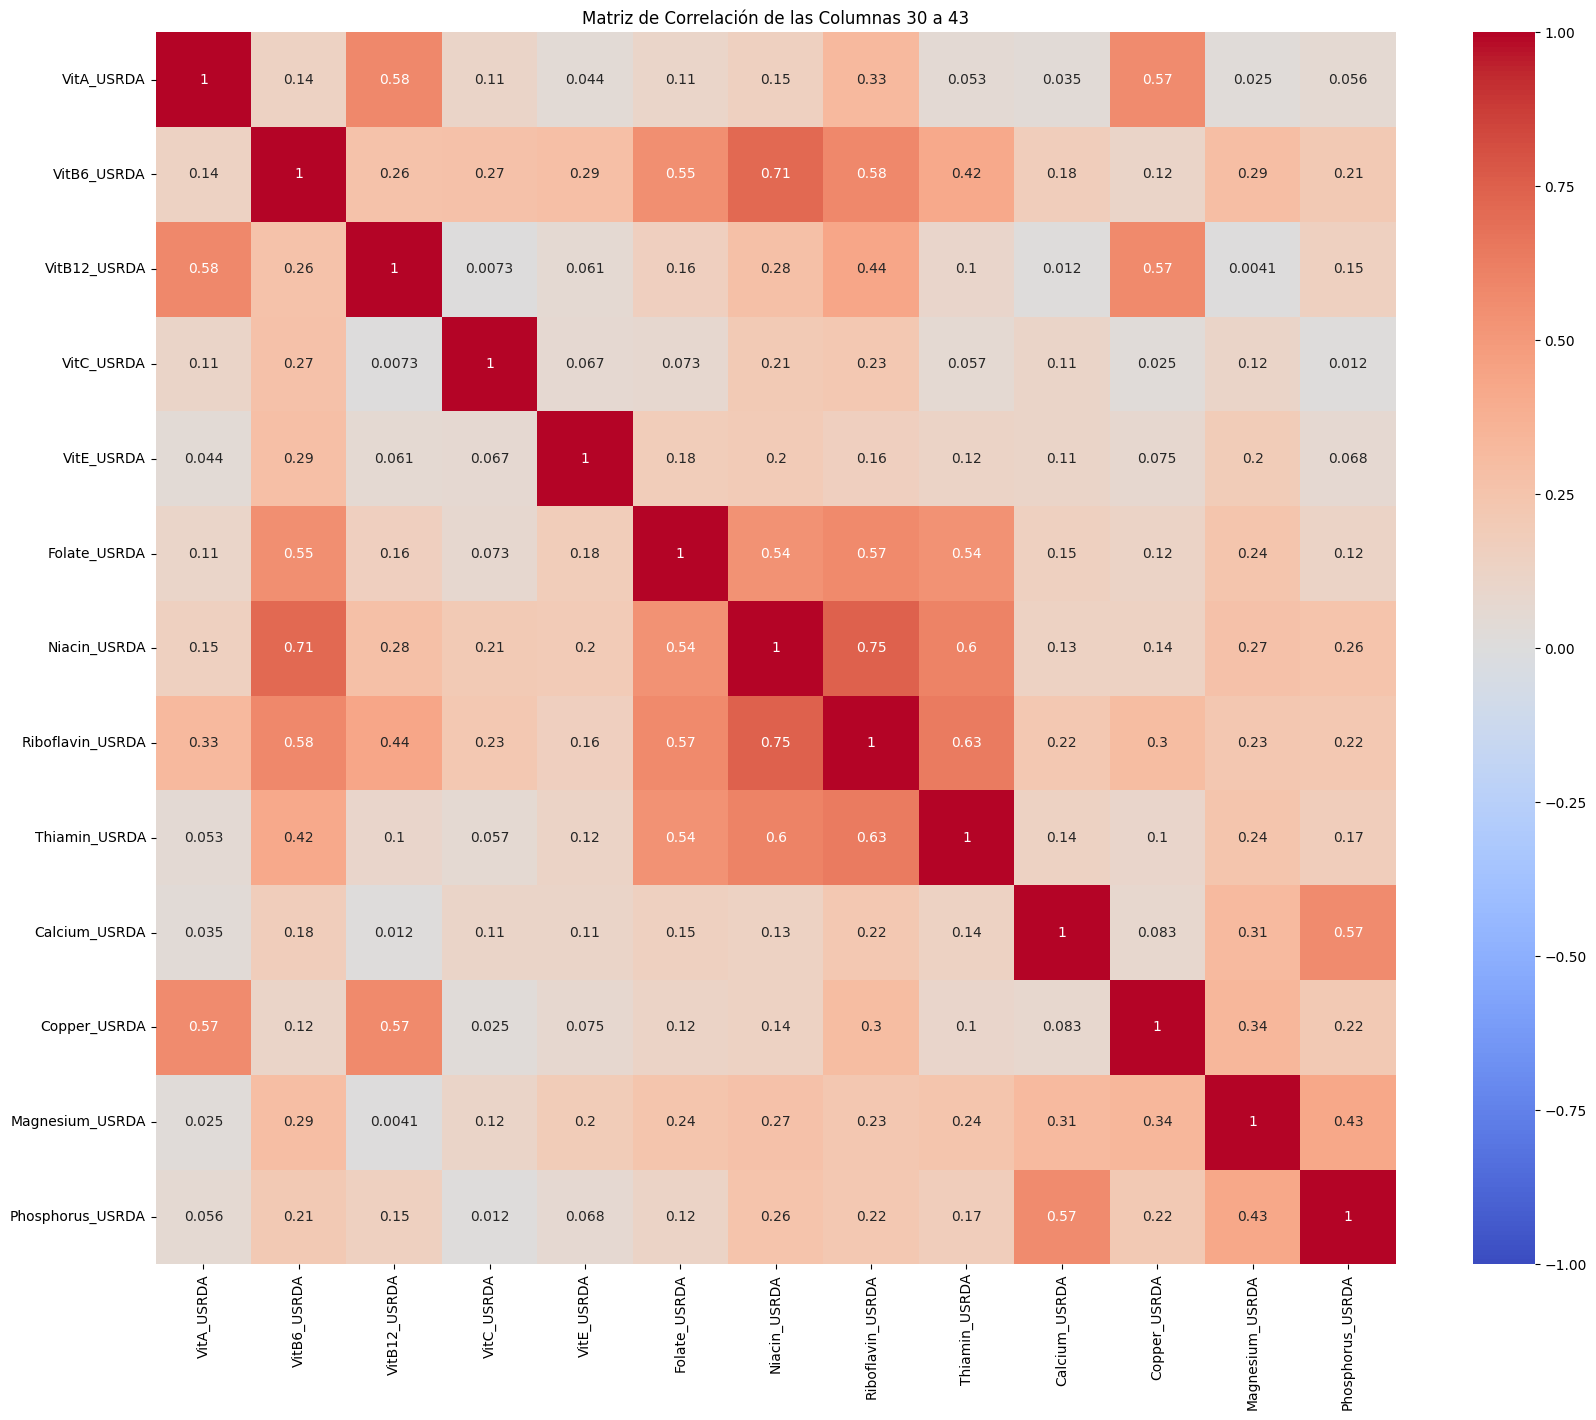

In [7]:
columnas_numericas1 = df.iloc[:, 30:43]
matriz_correlacion1 = columnas_numericas1.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlacion1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de las Columnas 30 a 43')
plt.show()

Se puede apreciar colinealidad entre las diferentes variables USRDA

In [10]:
df_filtrado = df.loc[:, ~df.columns.str.contains('USRDA')]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8618 non-null   int64  
 1   FoodGroup       8618 non-null   object 
 2   ShortDescrip    8618 non-null   object 
 3   Descrip         8618 non-null   object 
 4   CommonName      1063 non-null   object 
 5   MfgName         1560 non-null   object 
 6   ScientificName  732 non-null    object 
 7   Energy_kcal     8618 non-null   float64
 8   Protein_g       8618 non-null   float64
 9   Fat_g           8618 non-null   float64
 10  Carb_g          8618 non-null   float64
 11  Sugar_g         8618 non-null   float64
 12  Fiber_g         8618 non-null   float64
 13  VitA_mcg        8618 non-null   float64
 14  VitB6_mg        8618 non-null   float64
 15  VitB12_mcg      8618 non-null   float64
 16  VitC_mg         8618 non-null   float64
 17  VitE_mg         8618 non-null   f

quitamos para ello las variables USRDA

### Variables no numéricas
Elimina las variables de texto del dataset

In [22]:
df_numerico = df_filtrado.select_dtypes(include=['int64', 'float64']).drop('ID', axis=1)
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

Nos quedamos solamente, con las variables numéricas. Eliminando las variables de texto.

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [23]:
#Comenzamos realizando un método para hacer la transformación logaritmica.
def logaritmo(x):
    return np.log1p(x) #Logaritmo log(1+x) que maneja bien los valores cercanos a 0

df_logaritmico = df_numerico.apply(logaritmo) #Aplicamos a nuestro df numérico el método del logaritmo.

In [24]:
#A continuación visualizamos la distribución:

def plot_distribution(original, transformed, column_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(original, ax=ax1, kde=True)
    ax1.set_title(f'Distribución original: {column_name}')
    
    sns.histplot(transformed, ax=ax2, kde=True)
    ax2.set_title(f'Distribución en escala logarítmica: {column_name}')
    
    plt.tight_layout()
    plt.show()

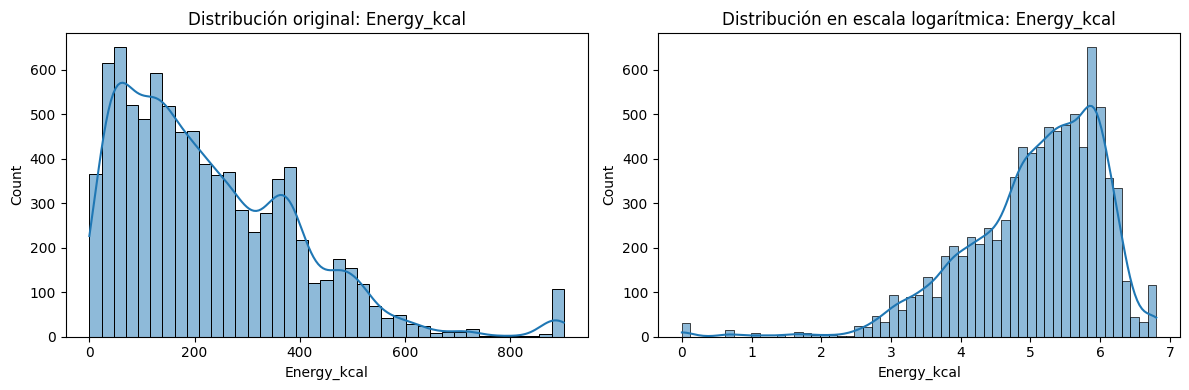

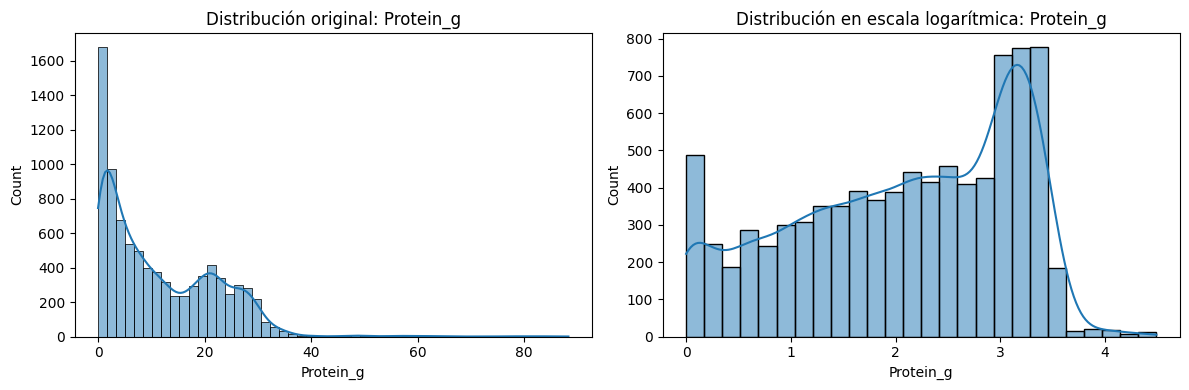

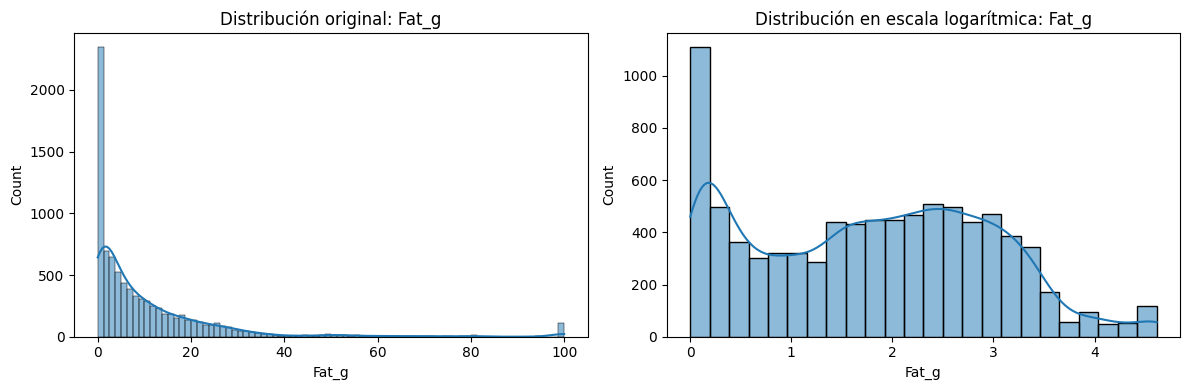

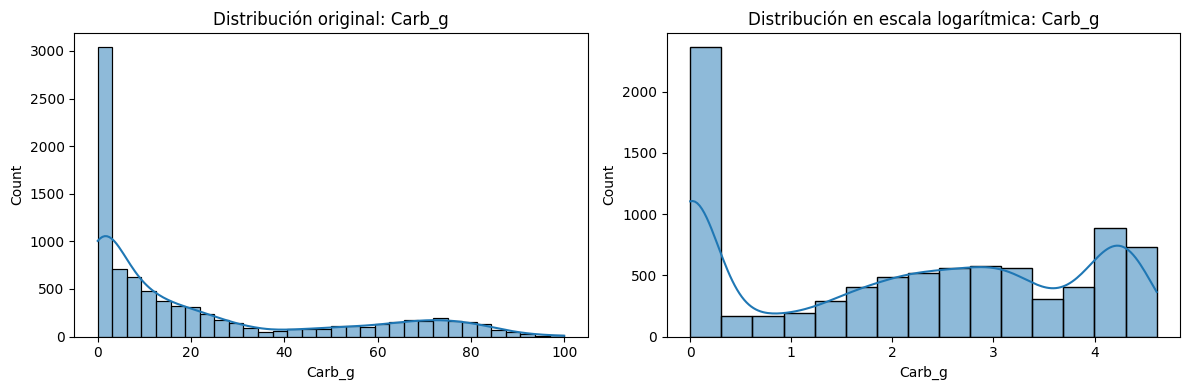

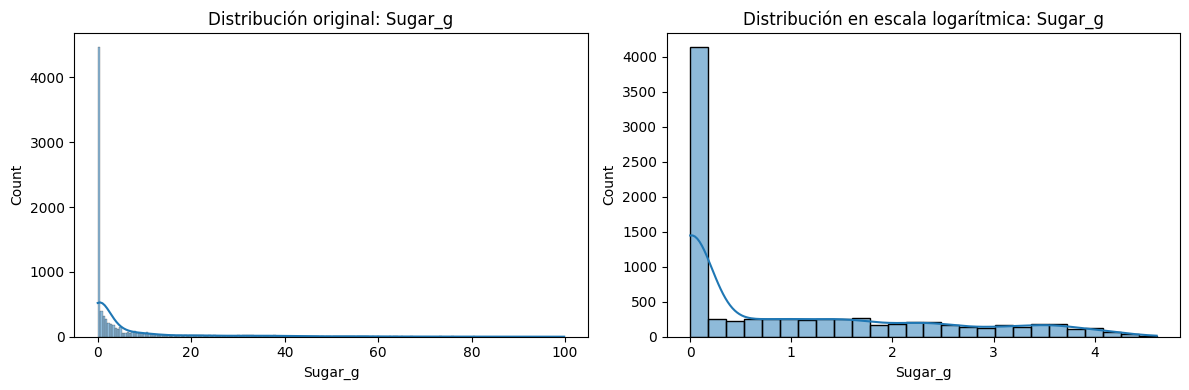

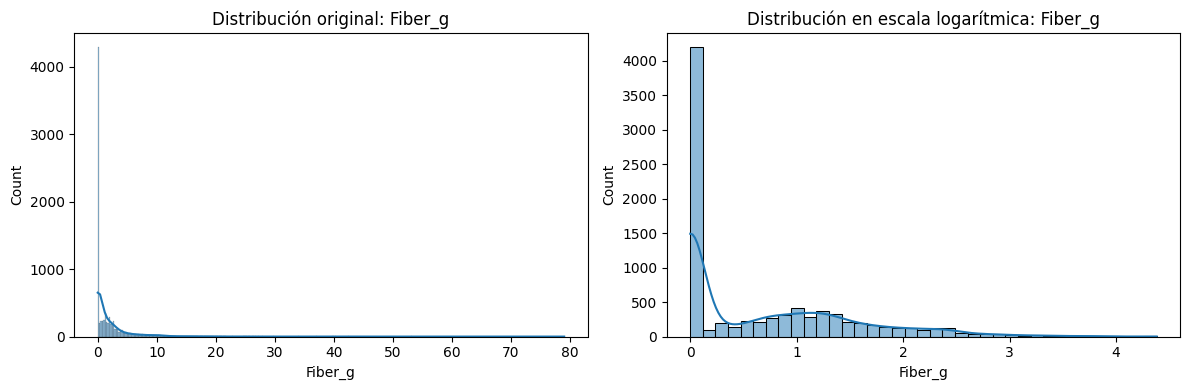

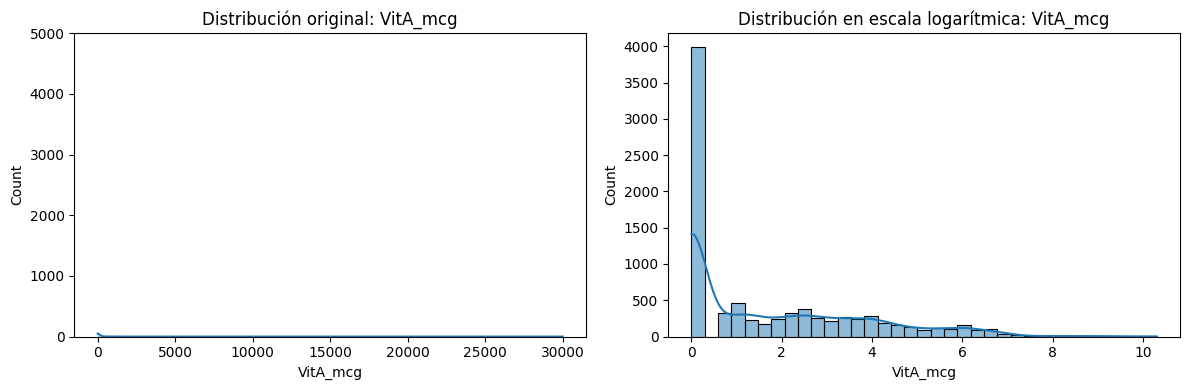

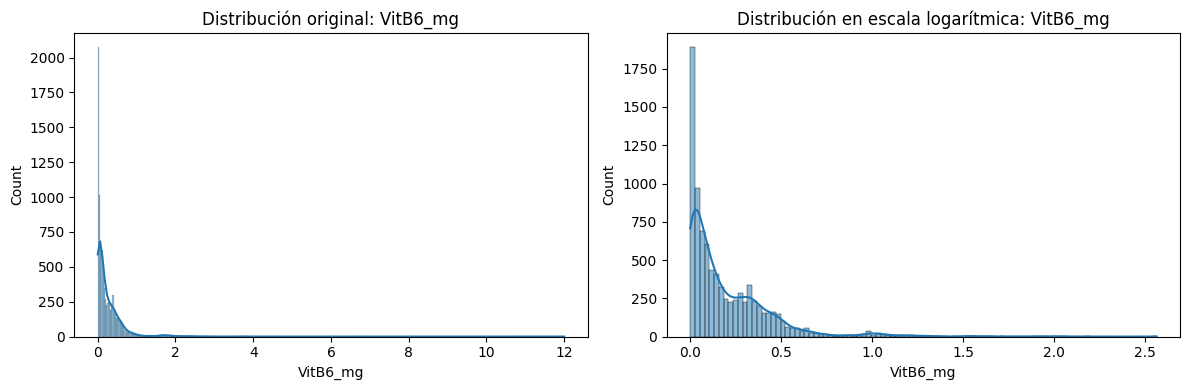

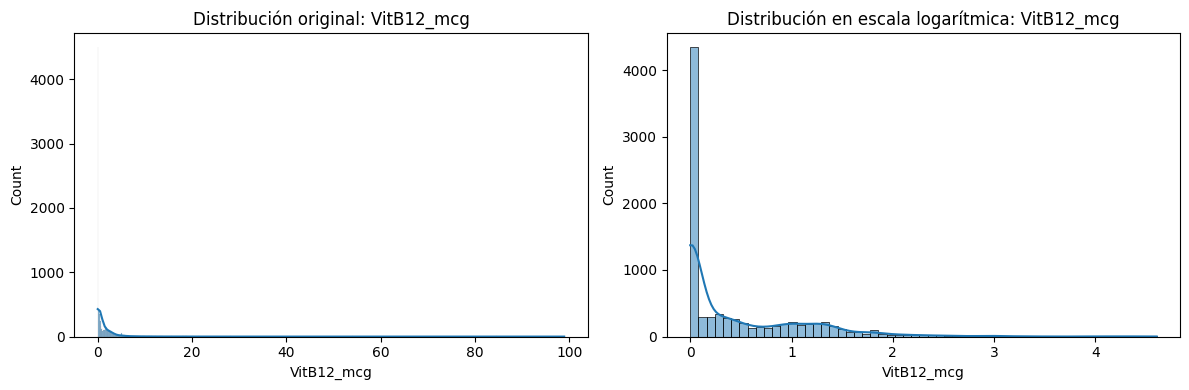

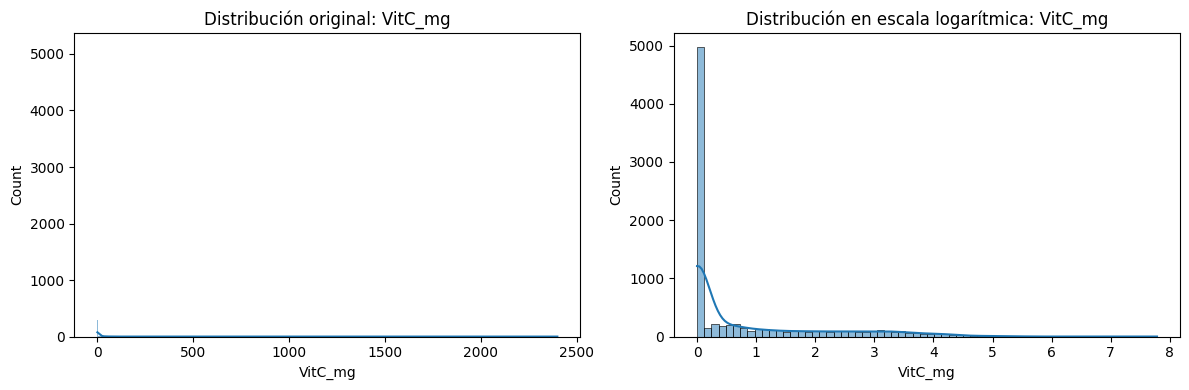

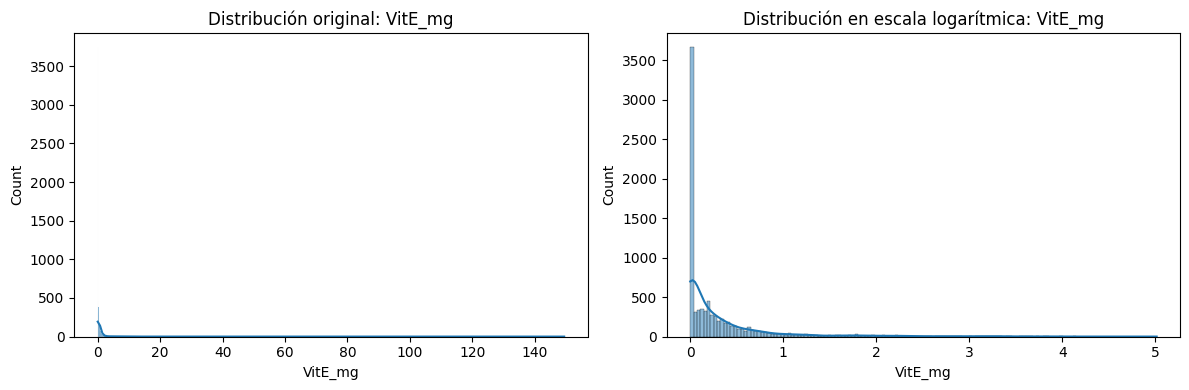

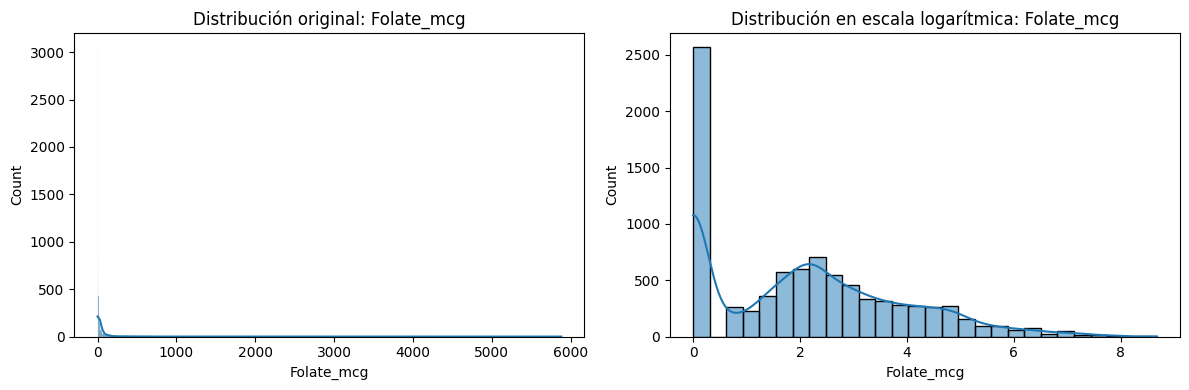

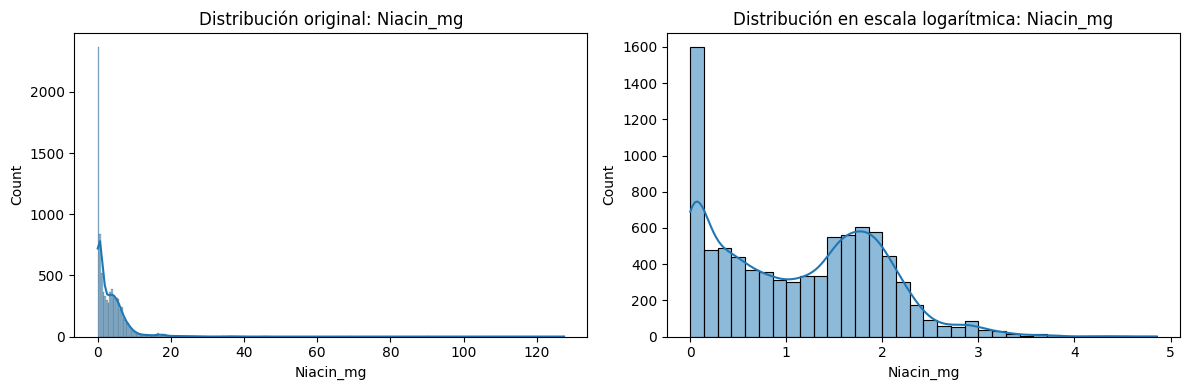

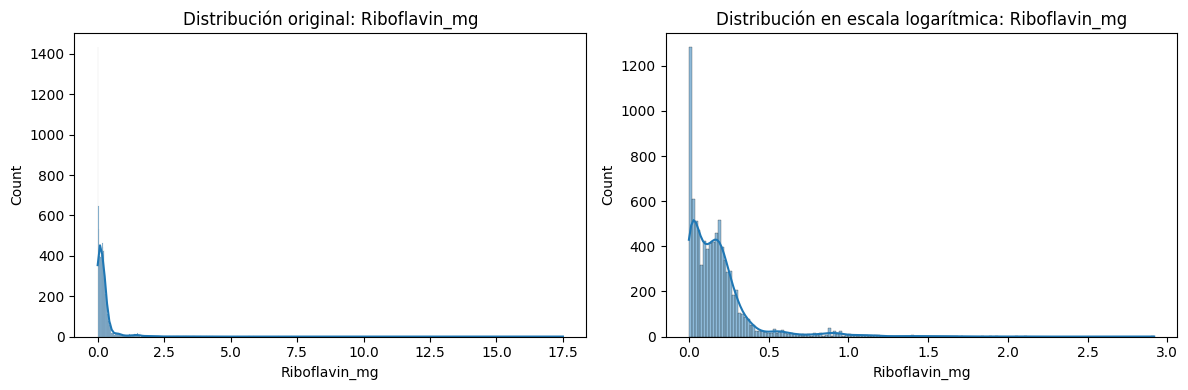

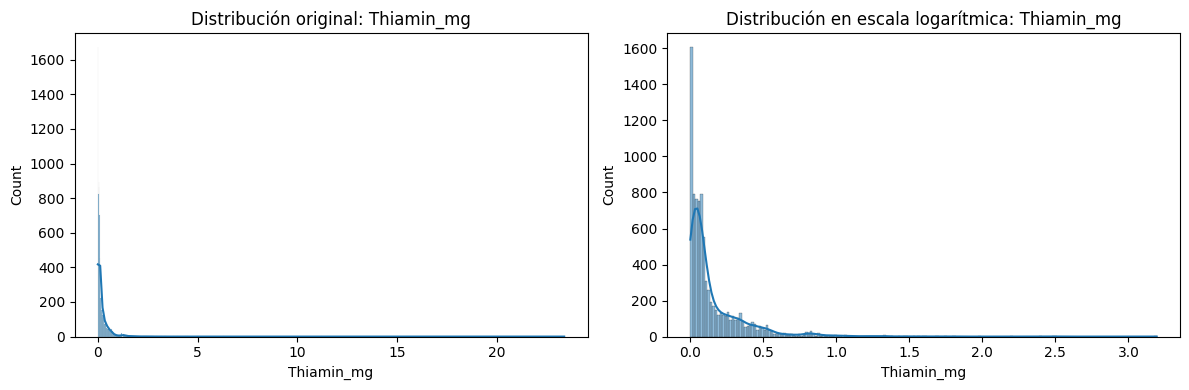

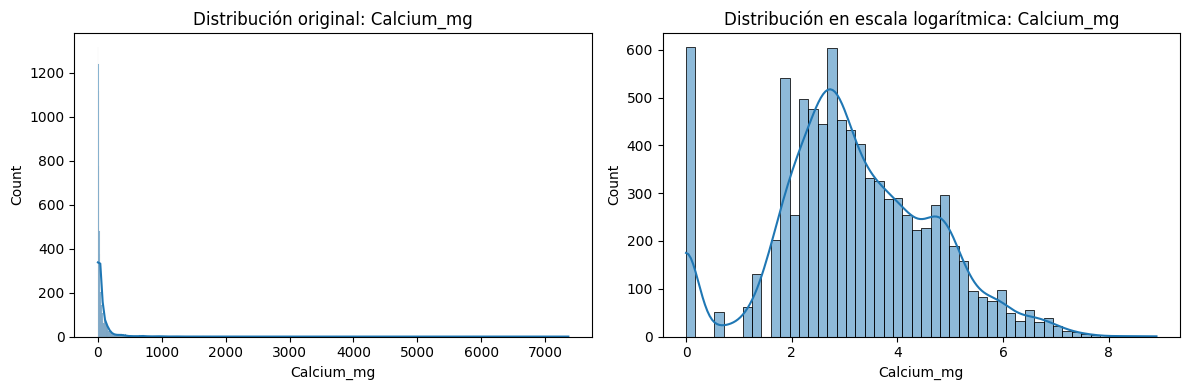

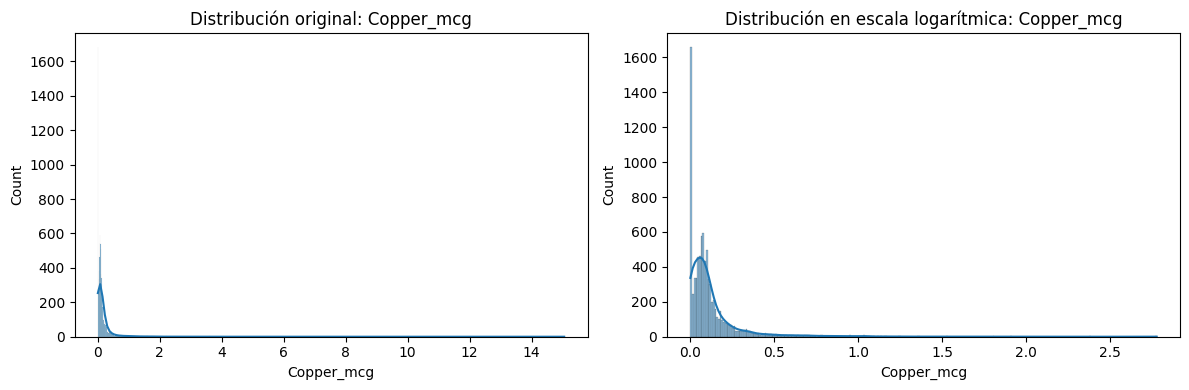

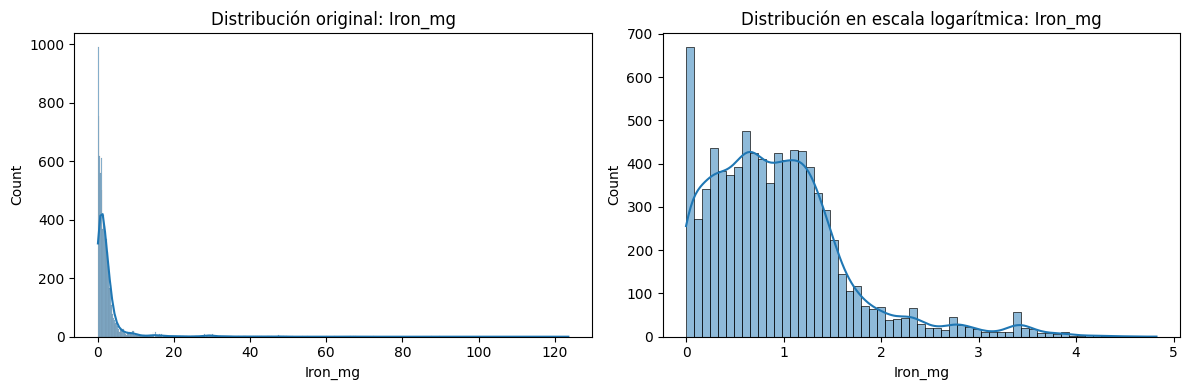

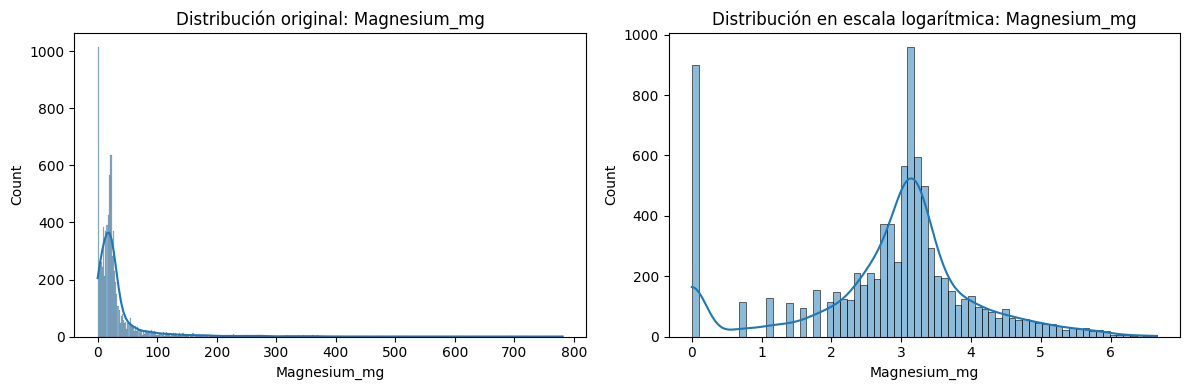

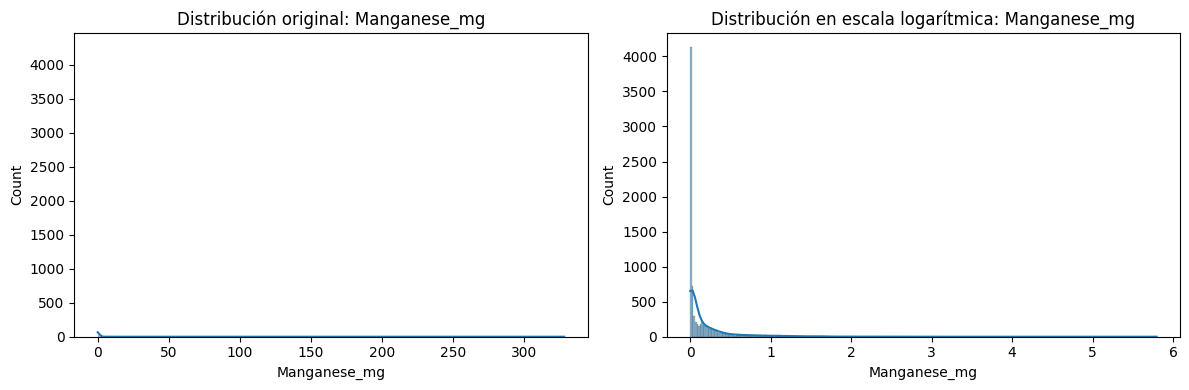

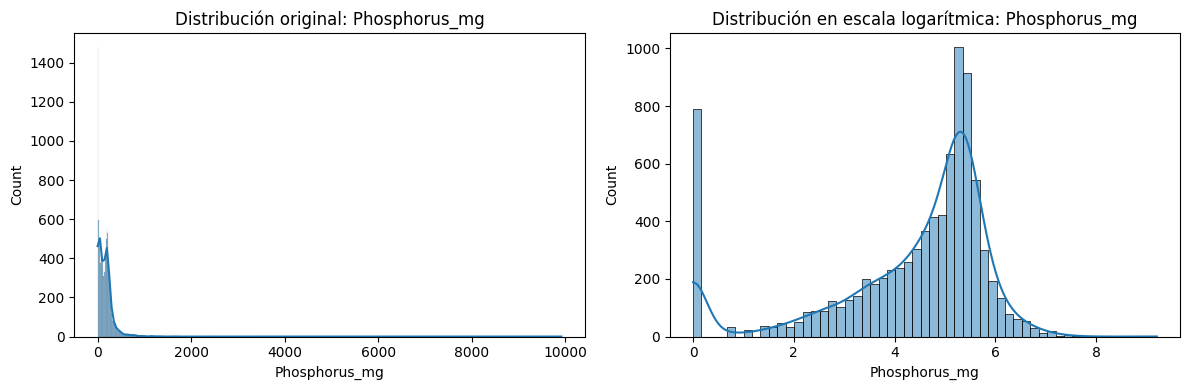

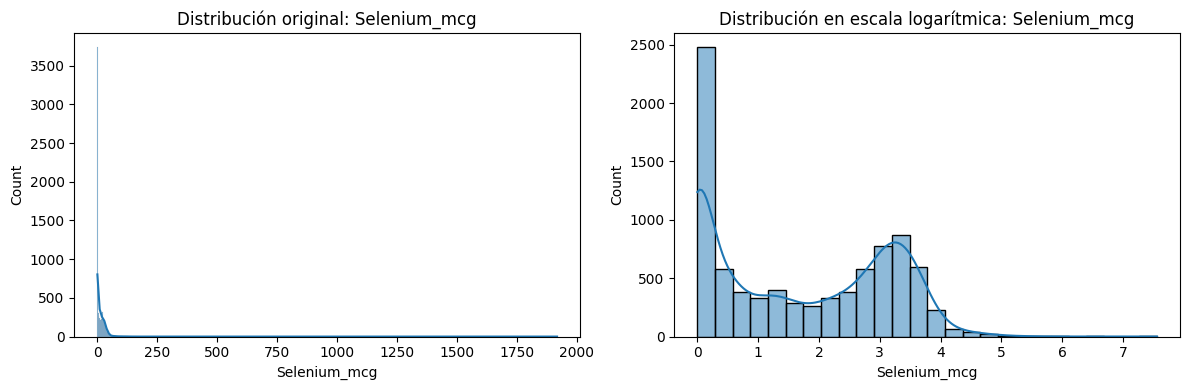

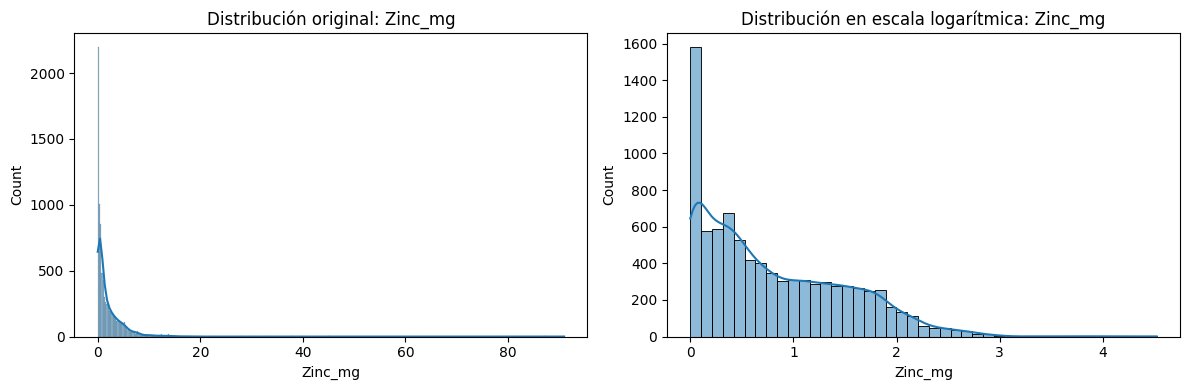

In [25]:
#Visualizando luego cada distribución una por una empleando un for (viendo la comparación entre la original y la logarítmica)
for column in df_numerico.columns:
    plot_distribution(df_numerico[column], df_logaritmico[column], column)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [28]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=23))
pca_pipe.fit(df_logaritmico)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=23))])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [29]:
modelo_pca = pca_pipe['pca']

In [30]:
modelo_pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [ 5.22265271e-01,  7.90226661e-02,  4.73911046e-01,
         2.10881292e-01,  1.8

In [32]:
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_logaritmico.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
             'PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23']
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,0.522265,0.079023,0.473911,0.210881,0.184202,0.136179,-0.292311,-0.159116,-0.185990,-0.394600,...,-0.096958,0.057955,-0.093723,-0.040051,0.039002,-0.073287,0.029160,-0.016400,-0.062524,-0.039190
PC4,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC5,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC6,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC7,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC8,-0.006633,0.043613,-0.090748,-0.000223,0.484500,0.066867,-0.381964,0.084649,0.247129,0.302244,...,-0.196122,-0.395320,0.056744,0.055444,-0.003136,0.191494,-0.196760,0.103840,-0.009711,0.317642
PC9,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC10,0.295080,0.017928,0.318727,0.035122,-0.210174,-0.101103,-0.080107,-0.183531,-0.065568,0.639078,...,-0.088774,-0.001610,-0.233598,0.020123,0.103469,0.016090,-0.165279,0.021910,-0.085098,-0.002007


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [ ]:
modelo_pca.explained_variance_ratio_ #Para la varianza original

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

In [39]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


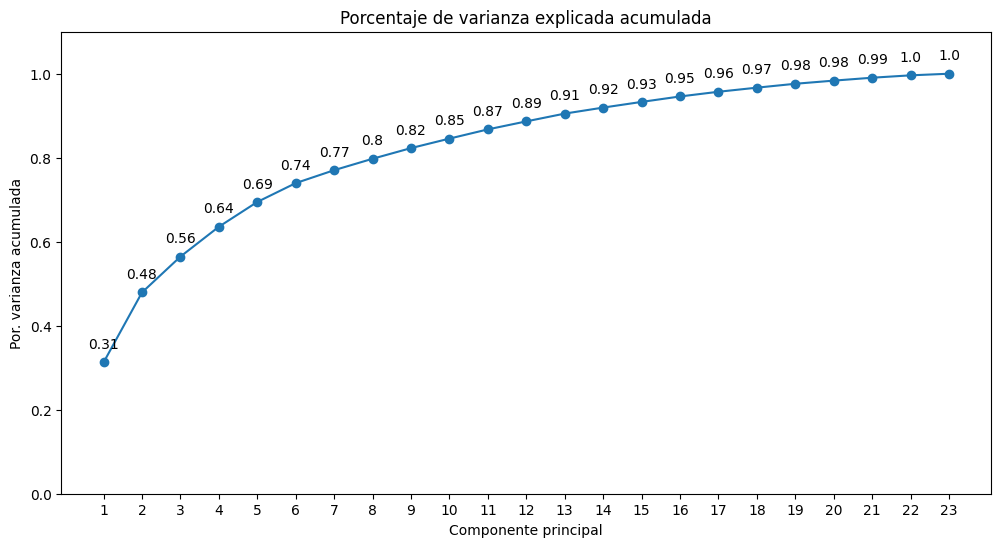

In [38]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(
    np.arange(len(df_logaritmico.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_logaritmico.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Nos está preguntando que si tuviésemos que quedarnos con el 70-75 % de la varianza original, ¿Con cuántos Principal Components nos quedaríamos?

Para ello, nos haría falta quedarnos con los 6 primeros valores:

Con los valores de la varianza original obtenidos:

PC1: 31.25%

PC2: 47.92% debido a: (31.25% + 16.67%)

PC3: 56.45% debido a: (47.92% + 8.53%)

PC4: 63.56% debido a: (56.45% + 7.11%)

PC5: 69.46% debido a: (63.56% + 5.90%)

PC6: 73.95% debido a: (69.46% + 4.49%)

Hasta llegar a coger el PC6: teniendo entonces un porcentaje de: 73.95% comprendido entre el 70% y el 75% de los valores que nos manda realizar.

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [56]:
# Añadimos el número de componentes principales seleccionados anteriormente, siendo este
n_components = 6

# Creamos el pipeline de PCA
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=n_components))

# Ajustamos el modelo y transformamos los datos
X_pca = pca_pipe.fit_transform(df_logaritmico)

# Creamos un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=df_logaritmico.index
)

# Mostramos las primeras filas de nuestro nuevo dataset
print(df_pca.head())

# Verificamos la forma del nuevo dataset
print("\nForma del nuevo dataset:")
print(df_pca.shape)

# Por último, lo comparamos con la forma del dataset original
print("\nForma del dataset original:")
print(df_logaritmico.shape)

        PC1       PC2       PC3       PC4       PC5       PC6
0 -2.139032 -0.968019  1.463988  0.270872  4.066991  0.307222
1 -2.106485 -0.909501  1.480580  0.263240  4.032459  0.348613
2 -3.267830 -1.138430  2.042335  1.175421  4.071722  1.326607
3  1.525964 -1.264102 -0.136013 -0.929808  2.430444 -2.095054
4  1.240712 -1.204120 -0.004729 -1.192002  2.691725 -2.341876

Forma del nuevo dataset:
(8618, 6)

Forma del dataset original:
(8618, 23)
